In [1]:
#Importing necessary packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.decomposition import PCA

import os
os.chdir (r"D:\anaconda\ashok\Project\FeatureEnggAndCrossvalidation")
import warnings
warnings.filterwarnings('ignore')

## Data pre-processing

In [2]:
# Loading Dataset - Reading the data as a data frame
concrete_df = pd.read_csv('concrete.csv')
print (concrete_df)

      cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2        29.22  
3        45.85  
4 

In [3]:
# Finding Shape of data
# Inference : There are 1030 rows and 9 columns of data
concrete_df.shape

(1030, 9)

In [4]:
# Finding Type
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
# Viewing first 10 rows of data
concrete_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


##### Observations:
1. There are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength)
2. All the records are numeric

In [6]:
# Checking last 10 records
concrete_df.tail(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1020,183.9,122.6,0.0,203.5,0.0,959.2,800.0,7,10.79
1021,203.5,305.3,0.0,203.5,0.0,963.4,630.0,3,9.56
1022,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28,13.20
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [7]:
#Information about the dataset
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
# Checking presence of missing values
concrete_df.isna().apply(pd.value_counts)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
False,1030,1030,1030,1030,1030,1030,1030,1030,1030


##### Observations:
1. There are 1030 rows and 9 columns of data in the given dataset
2. The data types of age column is "integer"  and all other 8 columns are "float" 
3. There are no null values in the data

In [9]:
# Five point summary
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


##### Observations
cement, slag and ash looks to be rightly skewed

## 1. Exploratory Data Analysis

### 1.a. Univariate Analysis of independent attributes


##### Independent Attribute-1 : cement

In [10]:
print('Range of values: ', concrete_df['cement'].max()-concrete_df['cement'].min())

Range of values:  438.0


In [11]:
#Central values 
print('Minimum age: ', concrete_df['cement'].min())
print('Maximum age: ',concrete_df['cement'].max())
print('Mean value: ', concrete_df['cement'].mean())
print('Median value: ',concrete_df['cement'].median())
print('Standard deviation: ', concrete_df['cement'].std())

Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.1678640776698
Median value:  272.9
Standard deviation:  104.50636449481536


In [12]:
#Quartiles

Q1=concrete_df['cement'].quantile(q=0.25)
Q3=concrete_df['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['cement']))

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [13]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [14]:
print('Number of outliers in cement upper : ', concrete_df[concrete_df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', concrete_df[concrete_df['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(concrete_df[concrete_df['cement']>586.4375]['cement'].count()*100/len(concrete_df)), '%')
print('% of Outlier in cement lower: ',round(concrete_df[concrete_df['cement']<-44.0625]['cement'].count()*100/len(concrete_df)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


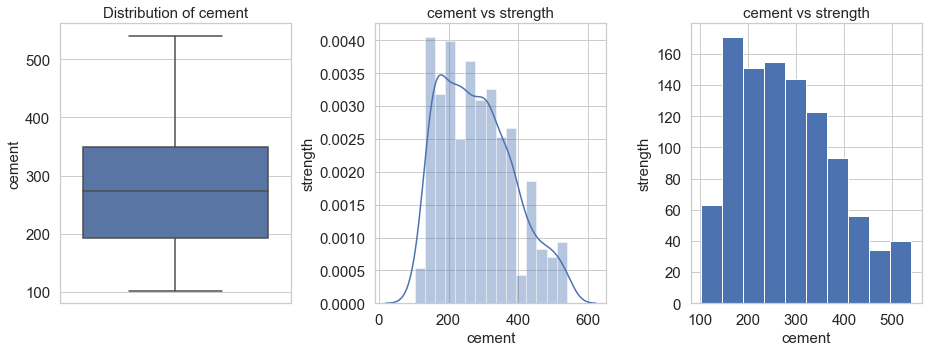

In [15]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='cement',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['cement'],ax=ax2)
ax2.set_xlabel('cement', fontsize=15)
ax2.set_ylabel('strength', fontsize=15)
ax2.set_title('cement vs strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['cement'])
ax3.set_xlabel('cement', fontsize=15)
ax3.set_ylabel('strength', fontsize=15)
ax3.set_title('cement vs strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Independent Attribute-2 : slag

In [16]:
#Range of values 
print('Range of values: ', concrete_df['slag'].max()-concrete_df['slag'].min())

Range of values:  359.4


In [17]:
#Central values

print('Minimum slag: ', concrete_df['slag'].min())
print('Maximum slag: ',concrete_df['slag'].max())
print('Mean value: ', concrete_df['slag'].mean())
print('Median value: ',concrete_df['slag'].median())
print('Standard deviation: ', concrete_df['slag'].std())
print('Null values: ',concrete_df['slag'].isnull().any())

Minimum slag:  0.0
Maximum slag:  359.4
Mean value:  73.89582524271844
Median value:  22.0
Standard deviation:  86.2793417481054
Null values:  False


In [18]:
#Quartiles

Q1=concrete_df['slag'].quantile(q=0.25)
Q3=concrete_df['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['slag']))


1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95


In [19]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)

Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [20]:
print('Number of outliers in slag upper : ', concrete_df[concrete_df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', concrete_df[concrete_df['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(concrete_df[concrete_df['slag']>357.375]['slag'].count()*100/len(concrete_df)), '%')
print('% of Outlier in slag lower: ',round(concrete_df[concrete_df['slag']<-214.425]['slag'].count()*100/len(concrete_df)), '%')

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slag lower:  0.0 %


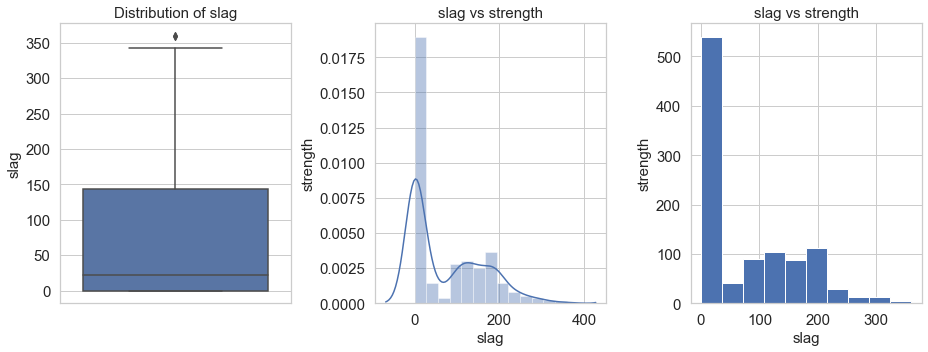

In [21]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['slag'],ax=ax2)
ax2.set_xlabel('slag', fontsize=15)
ax2.set_ylabel('strength', fontsize=15)
ax2.set_title('slag vs strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['slag'])
ax3.set_xlabel('slag', fontsize=15)
ax3.set_ylabel('strength', fontsize=15)
ax3.set_title('slag vs strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Independent Attribute-3 : ash

In [22]:
#Range of values observed

print('Range of values: ', concrete_df['ash'].max()-concrete_df['ash'].min())

Range of values:  200.1


In [23]:
#Central values

print('Minimum ash: ', concrete_df['ash'].min())
print('Maximum ash: ',concrete_df['ash'].max())
print('Mean value: ', concrete_df['ash'].mean())
print('Median value: ',concrete_df['ash'].median())
print('Standard deviation: ', concrete_df['ash'].std())

Minimum ash:  0.0
Maximum ash:  200.1
Mean value:  54.188349514563086
Median value:  0.0
Standard deviation:  63.99700415268794


In [24]:
#Quartiles 

Q1=concrete_df['ash'].quantile(q=0.25)
Q3=concrete_df['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['ash']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3


In [25]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [26]:
print('Number of outliers in ash upper : ', concrete_df[concrete_df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', concrete_df[concrete_df['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(concrete_df[concrete_df['ash']>295.75]['ash'].count()*100/len(concrete_df)), '%')
print('% of Outlier in ash lower: ',round(concrete_df[concrete_df['ash']<-177.45]['ash'].count()*100/len(concrete_df)), '%')

Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0.0 %
% of Outlier in ash lower:  0.0 %


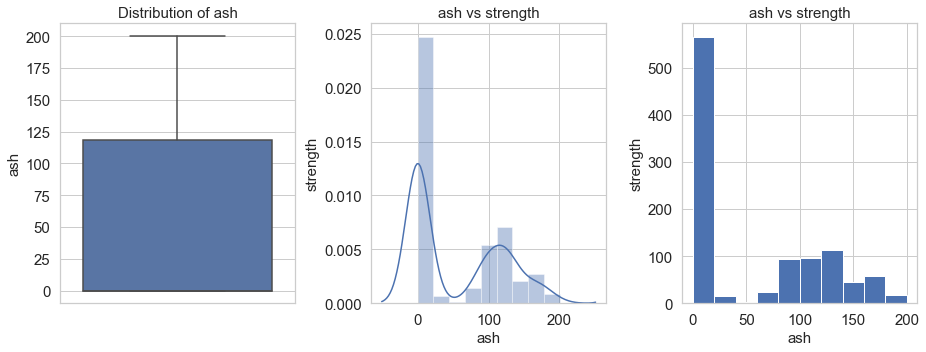

In [27]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('ash', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['ash'],ax=ax2)
ax2.set_xlabel('ash', fontsize=15)
ax2.set_ylabel('strength', fontsize=15)
ax2.set_title('ash vs strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['ash'])
ax3.set_xlabel('ash', fontsize=15)
ax3.set_ylabel('strength', fontsize=15)
ax3.set_title('ash vs strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Independent attribute-4: water

In [28]:
#Range of values observed

print('Range of values: ', concrete_df['water'].max()-concrete_df['water'].min())

Range of values:  125.2


In [29]:
#Central values
print('Minimum water: ', concrete_df['water'].min())
print('Maximum water: ',concrete_df['water'].max())
print('Mean value: ', concrete_df['water'].mean())
print('Median value: ',concrete_df['water'].median())
print('Standard deviation: ', concrete_df['water'].std())
print('Null values: ',concrete_df['water'].isnull().any())

Minimum water:  121.8
Maximum water:  247.0
Mean value:  181.56728155339798
Median value:  185.0
Standard deviation:  21.35421856503245
Null values:  False


In [30]:
#Quartiles
Q1=concrete_df['water'].quantile(q=0.25)
Q3=concrete_df['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['water']))

1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994


In [31]:
# Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [32]:
print('Number of outliers in water upper : ', concrete_df[concrete_df['water']>232.65]['water'].count())
print('Number of outliers in water lower : ', concrete_df[concrete_df['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(concrete_df[concrete_df['water']>232.65]['water'].count()*100/len(concrete_df)), '%')
print('% of Outlier in water lower: ',round(concrete_df[concrete_df['water']<124.25]['water'].count()*100/len(concrete_df)), '%')

Number of outliers in water upper :  4
Number of outliers in water lower :  5
% of Outlier in water upper:  0.0 %
% of Outlier in water lower:  0.0 %


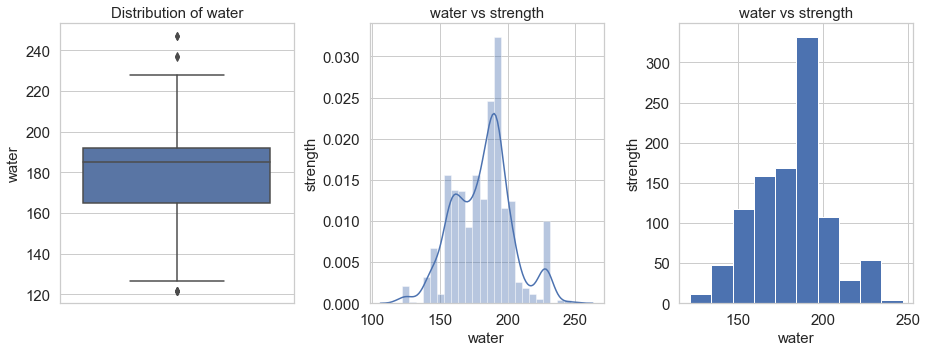

In [33]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['water'],ax=ax2)
ax2.set_xlabel('water', fontsize=15)
ax2.set_ylabel('strength', fontsize=15)
ax2.set_title('water vs strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['water'])
ax3.set_xlabel('water', fontsize=15)
ax3.set_ylabel('strength', fontsize=15)
ax3.set_title('water vs strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Independent attribute-5: superplastic

In [34]:
#Range of values observed

print('Range of values: ', concrete_df['superplastic'].max()-concrete_df['superplastic'].min())

Range of values:  32.2


In [35]:
#Central values

print('Minimum superplastic: ', concrete_df['superplastic'].min())
print('Maximum superplastic: ',concrete_df['superplastic'].max())
print('Mean value: ', concrete_df['superplastic'].mean())
print('Median value: ',concrete_df['superplastic'].median())
print('Standard deviation: ', concrete_df['superplastic'].std())
print('Null values: ',concrete_df['superplastic'].isnull().any())

Minimum superplastic:  0.0
Maximum superplastic:  32.2
Mean value:  6.204660194174756
Median value:  6.4
Standard deviation:  5.973841392485508
Null values:  False


In [36]:
#Quartiles

Q1=concrete_df['superplastic'].quantile(q=0.25)
Q3=concrete_df['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['superplastic']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2


In [37]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)

Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5


In [38]:
print('Number of outliers in superplastic upper : ', concrete_df[concrete_df['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', concrete_df[concrete_df['superplastic']<-15.3]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(concrete_df[concrete_df['superplastic']>25.5]['superplastic'].count()*100/len(concrete_df)), '%')
print('% of Outlier in superplastic lower: ',round(concrete_df[concrete_df['superplastic']<-15.3]['superplastic'].count()*100/len(concrete_df)), '%')

Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1.0 %
% of Outlier in superplastic lower:  0.0 %


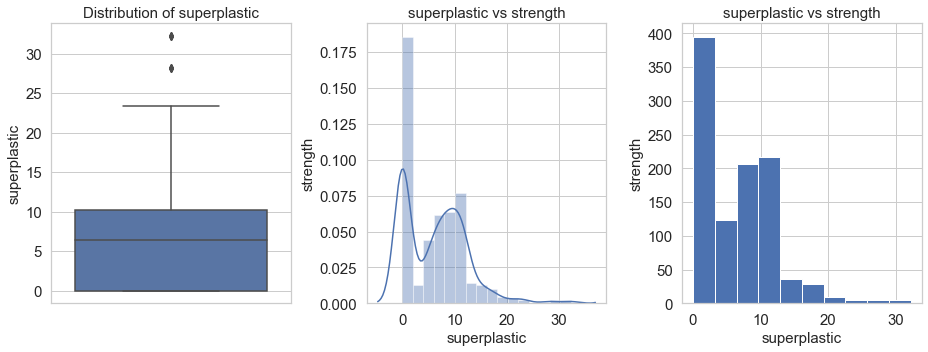

In [39]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['superplastic'],ax=ax2)
ax2.set_xlabel('superplastic', fontsize=15)
ax2.set_ylabel('strength', fontsize=15)
ax2.set_title('superplastic vs strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['superplastic'])
ax3.set_xlabel('superplastic', fontsize=15)
ax3.set_ylabel('strength', fontsize=15)
ax3.set_title('superplastic vs strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Independent attribute-6: coarseagg

In [40]:
#Range of values observed

print('Range of values: ', concrete_df['coarseagg'].max()-concrete_df['coarseagg'].min())

Range of values:  344.0


In [41]:
#Central values

print('Minimum value: ', concrete_df['coarseagg'].min())
print('Maximum value: ',concrete_df['coarseagg'].max())
print('Mean value: ', concrete_df['coarseagg'].mean())
print('Median value: ',concrete_df['coarseagg'].median())
print('Standard deviation: ', concrete_df['coarseagg'].std())
print('Null values: ',concrete_df['coarseagg'].isnull().any())

Minimum value:  801.0
Maximum value:  1145.0
Mean value:  972.918932038835
Median value:  968.0
Standard deviation:  77.75395396672087
Null values:  False


In [42]:
#Quartiles

Q1=concrete_df['coarseagg'].quantile(q=0.25)
Q3=concrete_df['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['coarseagg']))

1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009


In [43]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002


In [44]:
print('Number of outliers in coarseagg upper : ', concrete_df[concrete_df['coarseagg']>1175.5]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', concrete_df[concrete_df['coarseagg']<785.9]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(concrete_df[concrete_df['coarseagg']>1175.5]['coarseagg'].count()*100/len(concrete_df)), '%')
print('% of Outlier in coarseagg lower: ',round(concrete_df[concrete_df['coarseagg']<785.9]['coarseagg'].count()*100/len(concrete_df)), '%')

Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0.0 %
% of Outlier in coarseagg lower:  0.0 %


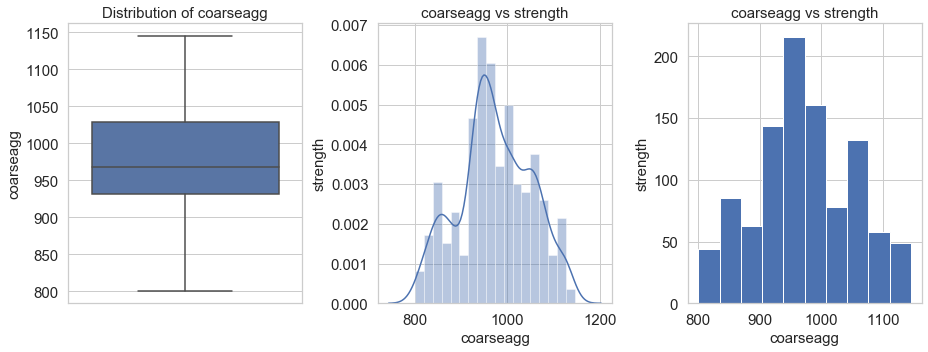

In [45]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['coarseagg'],ax=ax2)
ax2.set_xlabel('coarseagg', fontsize=15)
ax2.set_ylabel('strength', fontsize=15)
ax2.set_title('coarseagg vs strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['coarseagg'])
ax3.set_xlabel('coarseagg', fontsize=15)
ax3.set_ylabel('strength', fontsize=15)
ax3.set_title('coarseagg vs strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Independent attribute-7: fineagg

In [46]:
#Range of values observed

print('Range of values: ', concrete_df['fineagg'].max()-concrete_df['fineagg'].min())

Range of values:  398.6


In [47]:
#Central Values 

print('Minimum value: ', concrete_df['fineagg'].min())
print('Maximum value: ',concrete_df['fineagg'].max())
print('Mean value: ', concrete_df['fineagg'].mean())
print('Median value: ',concrete_df['fineagg'].median())
print('Standard deviation: ', concrete_df['fineagg'].std())
print('Null values: ',concrete_df['fineagg'].isnull().any())

Minimum value:  594.0
Maximum value:  992.6
Mean value:  773.5804854368932
Median value:  779.5
Standard deviation:  80.17598014240443
Null values:  False


In [48]:
#Quartiles

Q1=concrete_df['fineagg'].quantile(q=0.25)
Q3=concrete_df['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['fineagg']))

1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007


In [49]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)

Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575


In [50]:
print('Number of outliers in fineagg upper : ', concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count())
print('Number of outliers in fineagg lower : ', concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count()*100/len(concrete_df)), '%')
print('% of Outlier in fineagg lower: ',round(concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count()*100/len(concrete_df)), '%')

Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0.0 %
% of Outlier in fineagg lower:  0.0 %


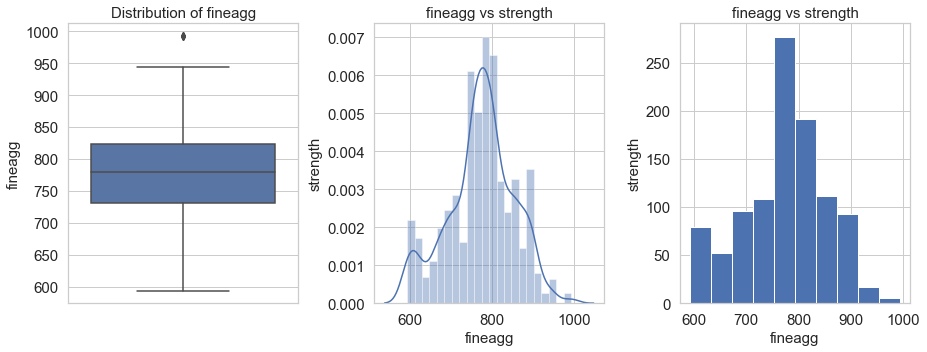

In [51]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['fineagg'],ax=ax2)
ax2.set_xlabel('fineagg', fontsize=15)
ax2.set_ylabel('strength', fontsize=15)
ax2.set_title('fineagg vs strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['fineagg'])
ax3.set_xlabel('fineagg', fontsize=15)
ax3.set_ylabel('strength', fontsize=15)
ax3.set_title('fineagg vs strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Independent Attribute-8: age

In [52]:
#Range of values observed

print('Range of values: ', concrete_df['age'].max()-concrete_df['age'].min())

Range of values:  364


In [53]:
#Central values

print('Minimum age: ', concrete_df['age'].min())
print('Maximum age: ',concrete_df['age'].max())
print('Mean value: ', concrete_df['age'].mean())
print('Median value: ',concrete_df['age'].median())
print('Standard deviation: ', concrete_df['age'].std())
print('Null values: ',concrete_df['age'].isnull().any())

Minimum age:  1
Maximum age:  365
Mean value:  45.662135922330094
Median value:  28.0
Standard deviation:  63.16991158103279
Null values:  False


In [54]:
#Quartiles

Q1=concrete_df['age'].quantile(q=0.25)
Q3=concrete_df['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['age']))

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0


In [55]:
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [56]:
print('Number of outliers in age upper : ', concrete_df[concrete_df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', concrete_df[concrete_df['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(concrete_df[concrete_df['age']>129.5]['age'].count()*100/len(concrete_df)), '%')
print('% of Outlier in age lower: ',round(concrete_df[concrete_df['age']<-66.5]['age'].count()*100/len(concrete_df)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


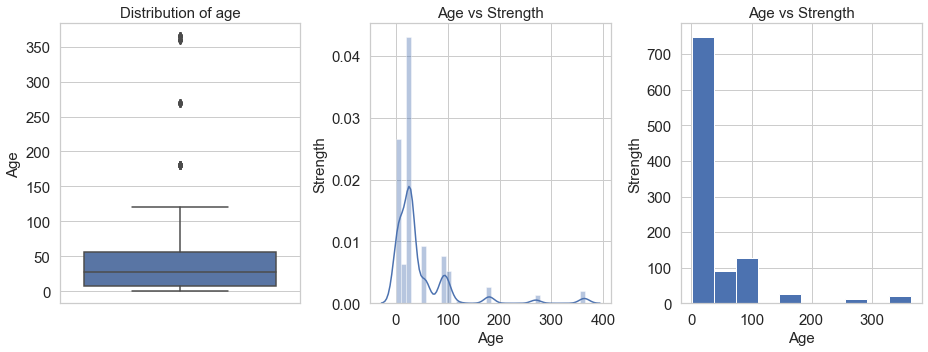

In [57]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### 1.b. Multivariate Analysis

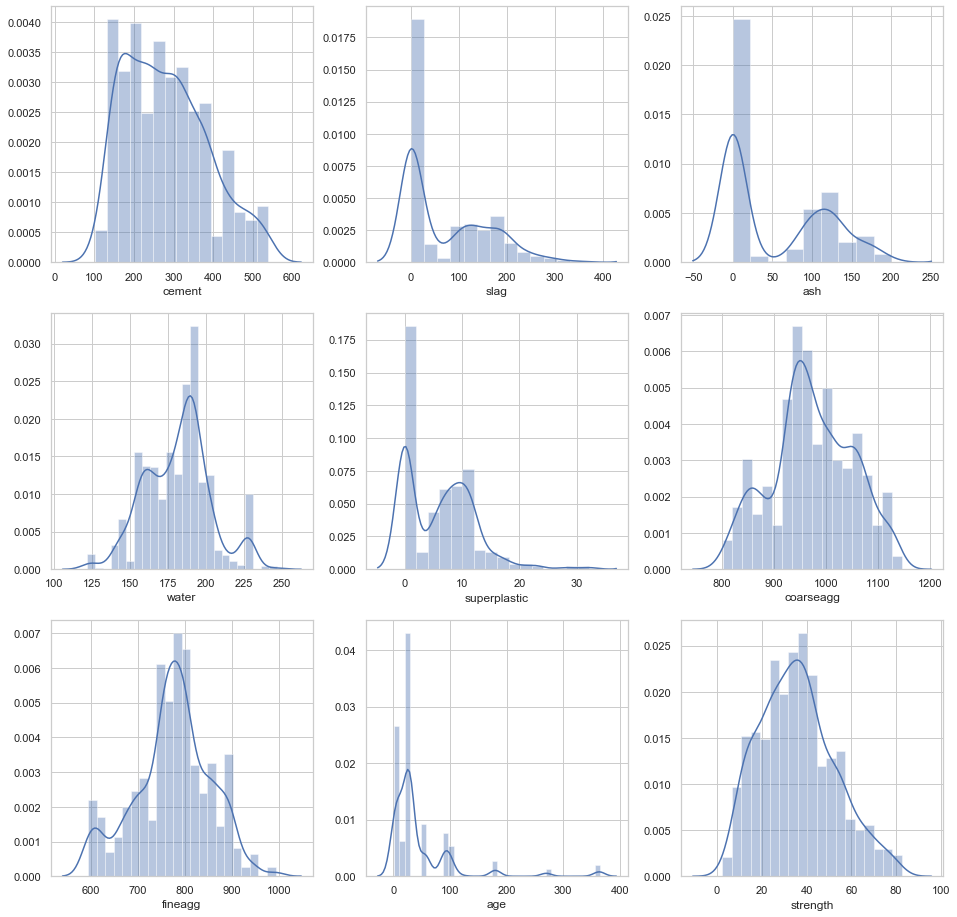

In [58]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(concrete_df['cement'],ax=ax2[0][0])
sns.distplot(concrete_df['slag'],ax=ax2[0][1])
sns.distplot(concrete_df['ash'],ax=ax2[0][2])
sns.distplot(concrete_df['water'],ax=ax2[1][0])
sns.distplot(concrete_df['superplastic'],ax=ax2[1][1])
sns.distplot(concrete_df['coarseagg'],ax=ax2[1][2])
sns.distplot(concrete_df['fineagg'],ax=ax2[2][0])
sns.distplot(concrete_df['age'],ax=ax2[2][1])
sns.distplot(concrete_df['strength'],ax=ax2[2][2])

###### Observations

1. cement is almost normal
2. slag has three gausssians and rightly skewed
3. ash has two gaussians and rightly skewed
4. water has three guassians and slighly left skewed
5. superplastic has two gaussians and rightly skewed
6. coarseagg has three guassians and almost normal
7. fineagg has almost two guassians and looks like normal
8. age has multiple guassians and rightly skewed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A483297988>,
      dtype=object)

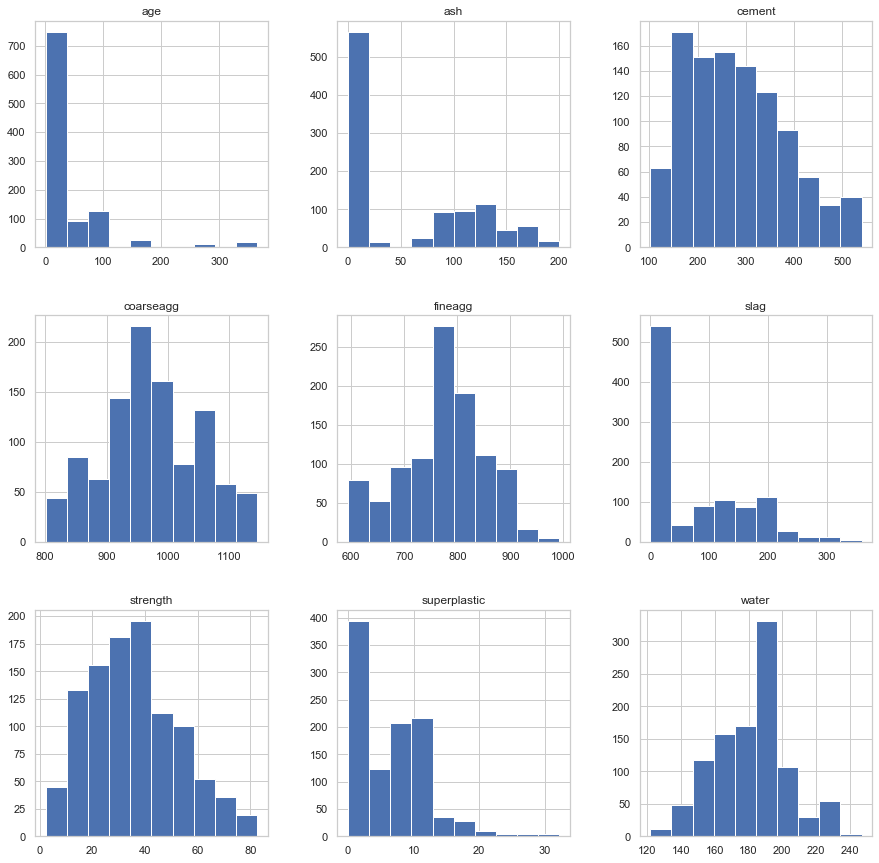

In [59]:
#Ploting histogram to check that if data columns are normal or almost normal or not
concrete_df.hist(figsize=(15,15))

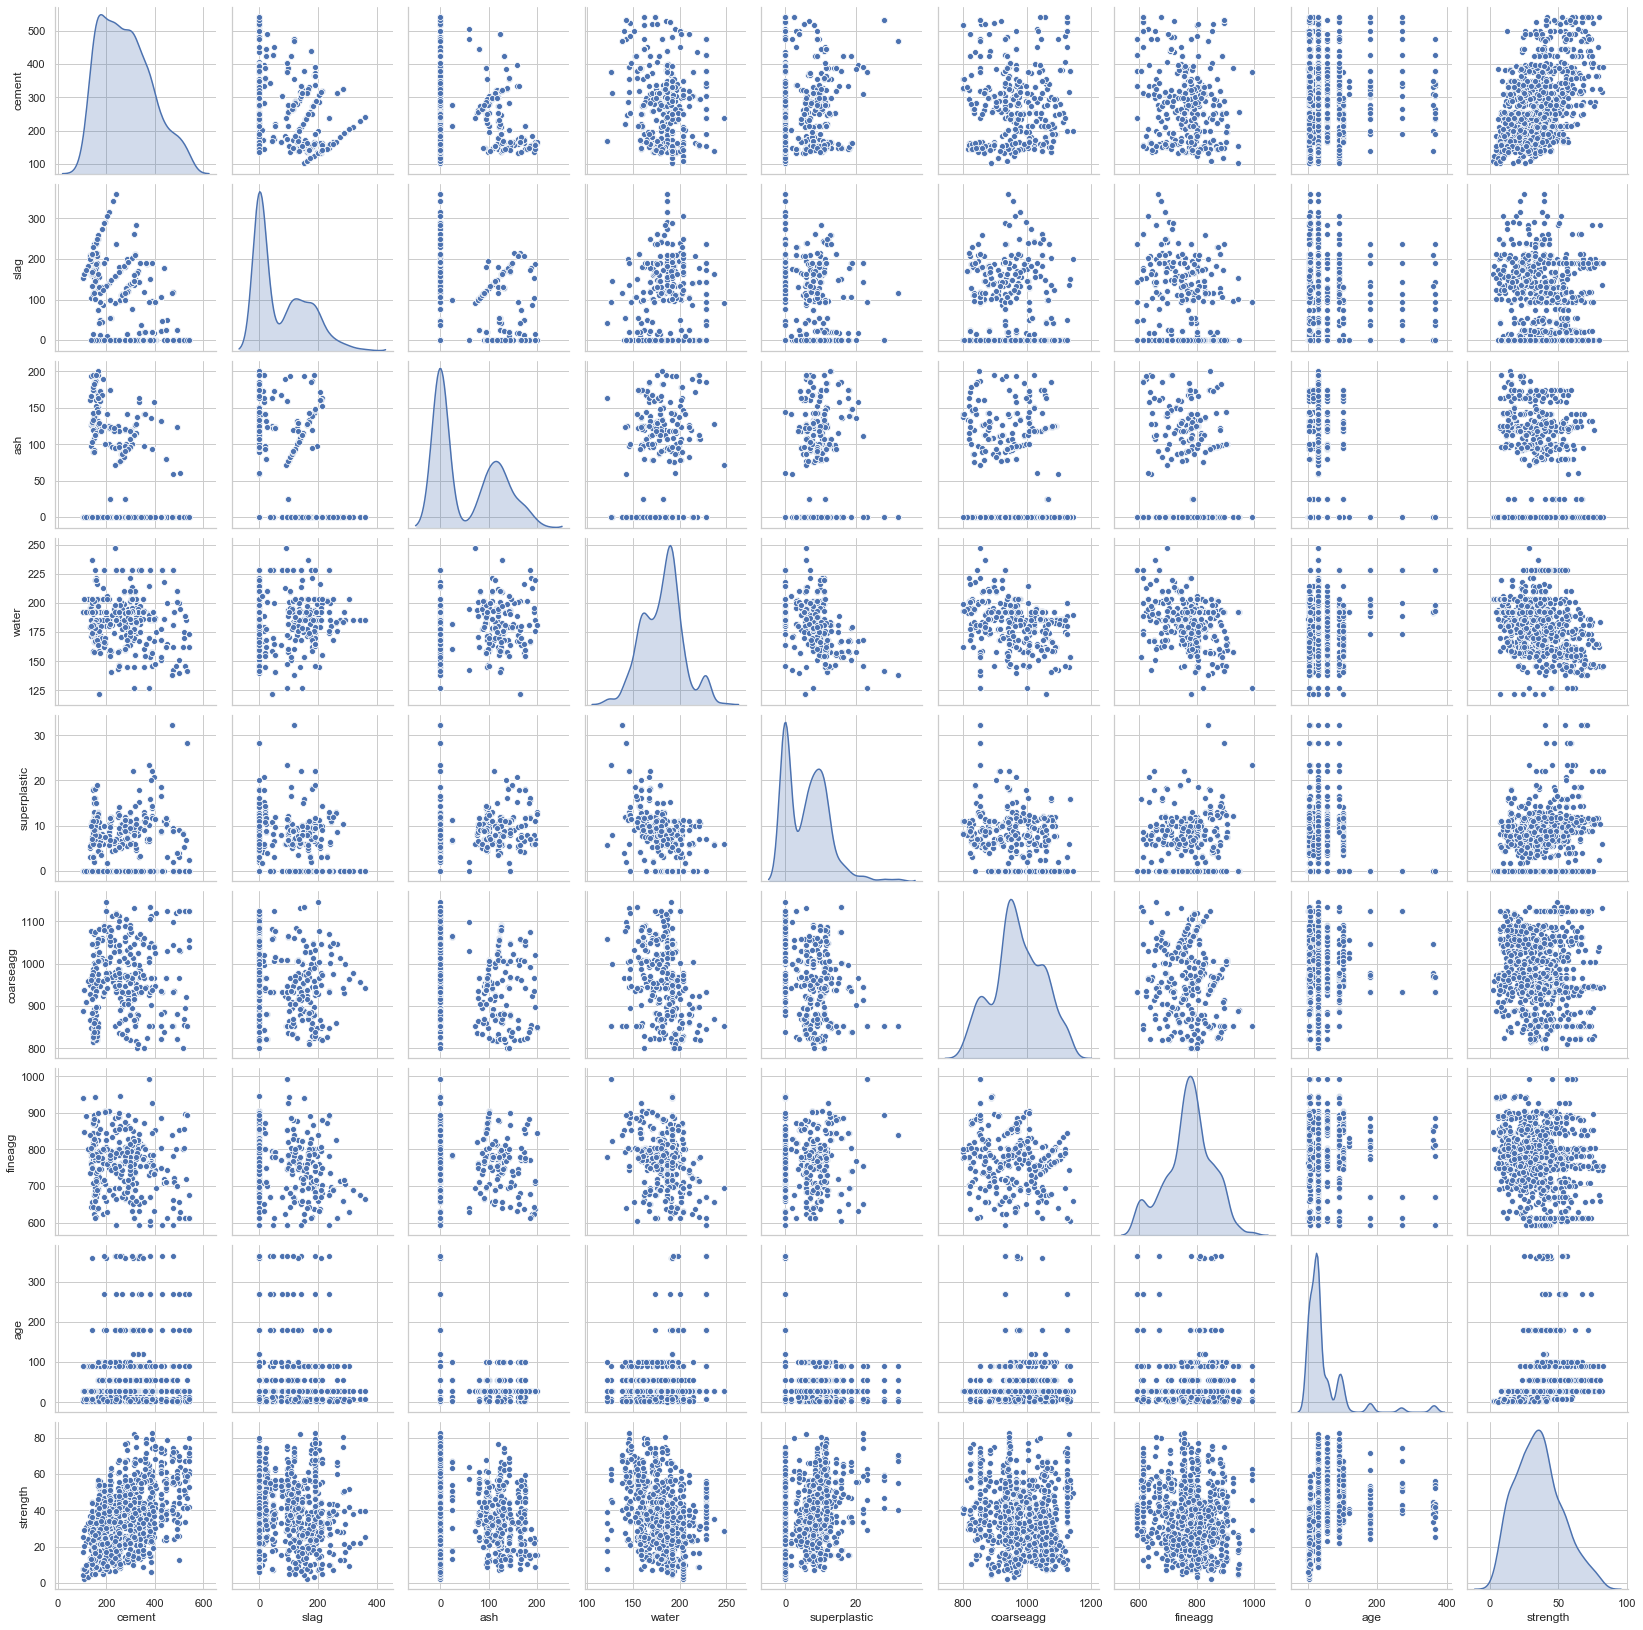

In [60]:
## pairplot

sns.pairplot(concrete_df, diag_kind='kde')

###### Diagonal Analysis:

1. cement attribute has almost normal curve
2. slag has two gausssians and rightly skewed.It shows the presence of outliers
3. ash has two gaussians and rightly skewed.It shows the presence of outliers
4. water has atleast three guassians and slighly left skewed.It shows the presence of outliers
5. superplastic has atleast two gaussians and rightly skewed.It shows the presence of outliers
6. coarseagg has three guassians and almost normal
7. fineagg has almost two guassians and looks like normal
8. age has multiple guassians and rightly skewed. It shows the presence of outliers.
9. strength is almost a normal curve
10. Outliers are there in the dataset

##### Off Diagonal Analysis using Pair Plot: Relationship between indpendent attributes

1. cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud.

2. slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. 

3. ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud.

4. water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes.

5. superplastic vs other independent attributes:This attribute has negative linear relationship only with water. It does not have any significant relationship with other independent attributes.

6. coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. 

7. fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. 

8. age vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. 

9. strength (dependent attribute) vs other independent attributes:

    - strength vs cement: It is linearly related to the cement. The relationship is positive and for a given value of cement, there are multiple values of strength. Hence, though cement has positive relationship with the strength, it is not a very good predictor. It is a weak predictor. 
    - strength vs slag: There is no particular trend. 
    - strength vs slag: There is no particular trend. 
    - strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor. 
    - strength vs superplastic:For a given value of age, there are multiple values of strength. Hence, It is not a good predictor. 
    - Other attributes does not give any strong relationship with strength. Hence, none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.So, Linear model cannot be used

In [61]:
# correlation matrix 
cor=concrete_df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


###### Observation:
From correlation matrix, it could be inferred that there are some positive and negative correlation between attributes. Further, correlation can be analysed using heatmap

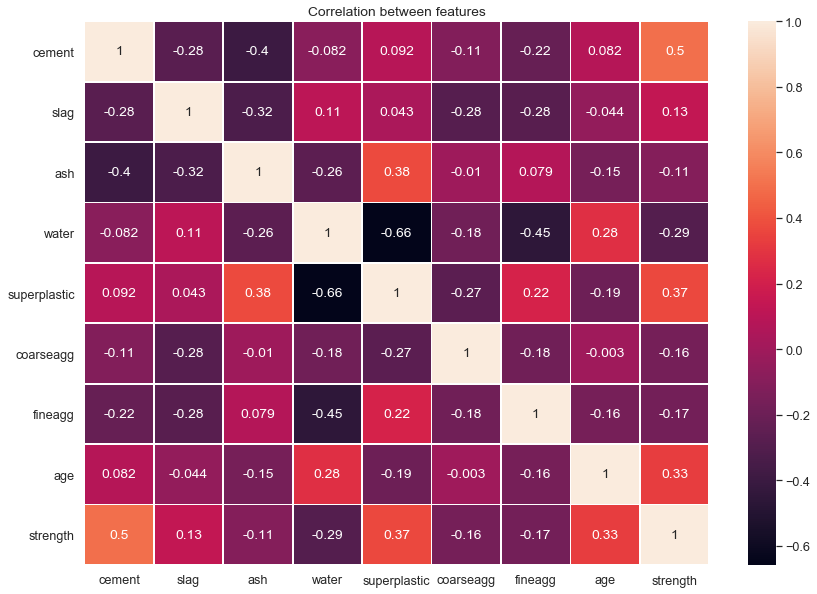

In [62]:
#heatmap

sns.set(font_scale=1.15)
fig, axs = plt.subplots(figsize=(14,10))        
sns.heatmap(cor, annot=True, linewidths=.8, ax=axs)
plt.title('Correlation between features');

##### Observations from heatmap:
1. water shows negative relationship with superplastic and fineagg
2. water also shows some kind of positive relationship with slag and age
3. superplastic shows positive relationship with ash

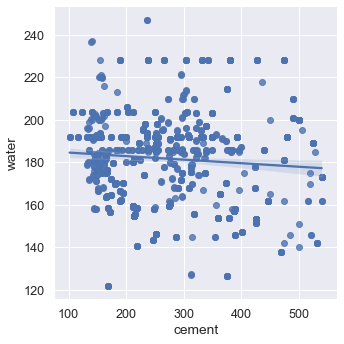

In [63]:
# lmplot to observe relationship between water and cement which are negatively correlated
sns.lmplot(x="cement",y="water",data=concrete_df)
plt.show()

### 1.c. Addressing outliers and missing values

In [64]:
# Check for missing values 
# Inference: There are no missing values
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

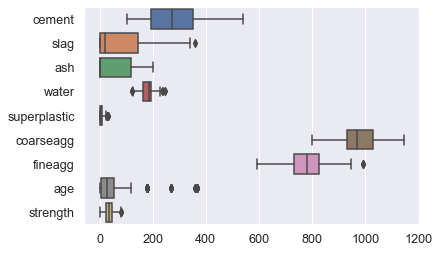

In [65]:
# Plotting the Box Plot to check outliers
ax = sns.boxplot(data=concrete_df, orient="h")

##### Inference: 
slag,water,superplastic, fineagg, age have outliers which are to be treated

In [66]:
#Number of outliers present in the dataset
concrete_df1=concrete_df.copy()
print('Number of outliers in cement: ',concrete_df1[((concrete_df1.cement - concrete_df1.cement.mean()) / concrete_df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_df1[((concrete_df1.ash - concrete_df1.ash.mean()) / concrete_df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_df1[((concrete_df1.coarseagg - concrete_df1.coarseagg.mean()) / concrete_df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_df1[((concrete_df1.fineagg - concrete_df1.fineagg.mean()) / concrete_df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'].count())


Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


Here, Standard deviation method is used to detect the outliers.If any data point is more than 3 times the standard deviation, then those points are very likely to be outliers. It can be inferred that slag, water, superplastic and age contain outliers

##### Finding out which records contain outliers for columns - slag, water, superplastic and age

In [67]:
print('Records containing outliers in slag: \n',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'])

Records containing outliers in slag: 
 21     342.1
564    342.1
918    359.4
990    359.4
Name: slag, dtype: float64


In [68]:
print('Records containing outliers in water: \n',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'])

Records containing outliers in water: 
 66     247.0
263    246.9
Name: water, dtype: float64


In [69]:
print('Records containing outliers in superplastic: \n',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'])

Records containing outliers in superplastic: 
 44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64


In [70]:
print('Records containing outliers in age: \n',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'])

Records containing outliers in age: 
 64      365
133     365
149     270
157     360
159     365
198     365
256     270
262     270
270     270
297     270
313     270
323     360
361     360
393     365
448     360
465     365
484     365
570     270
601     365
623     270
632     270
713     365
720     365
754     365
755     360
850     270
878     270
901     365
919     360
951     270
957     365
995     365
1028    270
Name: age, dtype: int64


In [71]:
#Handling the outliers

#Replacing the outliers by median
for col_name in concrete_df1.columns[:-1]:
    q1 = concrete_df1[col_name].quantile(0.25)
    q3 = concrete_df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_df1.loc[(concrete_df1[col_name] < low) | (concrete_df1[col_name] > high), col_name] = concrete_df1[col_name].median()

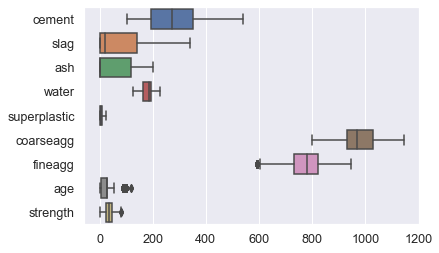

In [72]:
# Plottng Box Plot to check whether outliers are removed after removing outliers
ax = sns.boxplot(data=concrete_df1, orient="h")

##### Observations:
1. There are no missing values
2. Outliers are also replaced by median


## 2.  Applying Feature Engineering Techniques

In [73]:
#Scaling the features

concrete_df_z = concrete_df1.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=concrete_df.columns)

1. all the attributes in the same scale except the age attribute. Hence, we are scaling the attributes. 
2. zscore is used for scaling

In [74]:
#Splitting the data into independent and dependent attributes
X = concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

In [75]:
# Spliting data into training and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

### 2.a. Identifying opportunities to create a composite feature or drop features

In [76]:
# Noting coefficients using Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
X_train.columns

Lasso model: [ 0.4546666   0.15454285 -0.         -0.07380768  0.156032   -0.
 -0.          0.40665977]


Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

##### Observation:
1. Based on Lasso model, coefficients have become 0 for attributes: ash, coarseagg and fineagg indicating those dimensions can be dropped from the model

In [77]:
# Using PCA , extracting Principal Components that capture about 95% of the variance in the data

# Creating covariance matrix
cov_matrix = np.cov(X.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (8, 8)
Covariance_matrix [[ 1.00097182 -0.27531288 -0.39785361 -0.09170324  0.01334914 -0.10945526
  -0.23893031 -0.03199317]
 [-0.27531288  1.00097182 -0.32077961  0.0989759   0.06125422 -0.2841575
  -0.28265703 -0.02899893]
 [-0.39785361 -0.32077961  1.00097182 -0.24825152  0.44792672 -0.00997051
   0.09181814  0.05798414]
 [-0.09170324  0.0989759  -0.24825152  1.00097182 -0.65869585 -0.15708001
  -0.42671284 -0.04034284]
 [ 0.01334914  0.06125422  0.44792672 -0.65869585  1.00097182 -0.22472117
   0.15674363  0.06207279]
 [-0.10945526 -0.2841575  -0.00997051 -0.15708001 -0.22472117  1.00097182
  -0.16153401  0.01809514]
 [-0.23893031 -0.28265703  0.09181814 -0.42671284  0.15674363 -0.16153401
   1.00097182  0.0515824 ]
 [-0.03199317 -0.02899893  0.05798414 -0.04034284  0.06207279  0.01809514
   0.0515824   1.00097182]]


In [78]:
# Calculating Eigen Vectors & Eigen Values: Using numpy linear algebra function
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.13864521  0.4616323   0.18391885  0.29239212 -0.77120428  0.19666184
   0.09509706  0.07667113]
 [-0.20081759  0.43885329  0.23957687 -0.70406079  0.00894784 -0.42074745
   0.18747591  0.04154168]
 [ 0.45490138  0.36956767  0.40296876  0.0025718   0.39249647  0.51294037
   0.26641744 -0.07716533]
 [-0.54199264  0.39033759 -0.50000275 -0.06674956  0.2880307   0.44521204
  -0.12926325  0.03921546]
 [ 0.52861741  0.07138518 -0.67562761 -0.28061655 -0.26704682  0.04730558
   0.32661666  0.00438424]
 [-0.02304487  0.3401868  -0.18299729  0.57624286  0.29722932 -0.52061206
   0.39814401 -0.01723948]
 [ 0.38833488  0.42942606 -0.0769803   0.05444886  0.03153016 -0.22291151
  -0.7760181  -0.05487116]
 [ 0.09480036 -0.0114048   0.02244038  0.02402029  0.08657547  0.00313743
  -0.02684963  0.99074529]]

 Eigen Values 
%s [2.17110218 0.04312865 0.17591584 1.40569608 1.30106667 0.90796844
 1.01462665 0.98827003]


In [79]:
# Sorting eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

#  print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)


[(2.171102182662437, array([-0.13864521, -0.20081759,  0.45490138, -0.54199264,  0.52861741,
       -0.02304487,  0.38833488,  0.09480036])), (1.4056960826798972, array([ 0.29239212, -0.70406079,  0.0025718 , -0.06674956, -0.28061655,
        0.57624286,  0.05444886,  0.02402029])), (1.3010666698861055, array([-0.77120428,  0.00894784,  0.39249647,  0.2880307 , -0.26704682,
        0.29722932,  0.03153016,  0.08657547])), (1.0146266518555638, array([ 0.09509706,  0.18747591,  0.26641744, -0.12926325,  0.32661666,
        0.39814401, -0.7760181 , -0.02684963])), (0.9882700256424721, array([ 0.07667113,  0.04154168, -0.07716533,  0.03921546,  0.00438424,
       -0.01723948, -0.05487116,  0.99074529])), (0.9079684411452992, array([ 0.19666184, -0.42074745,  0.51294037,  0.44521204,  0.04730558,
       -0.52061206, -0.22291151,  0.00313743])), (0.17591583665430705, array([ 0.18391885,  0.23957687,  0.40296876, -0.50000275, -0.67562761,
       -0.18299729, -0.0769803 ,  0.02244038])), (0.04

In [80]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

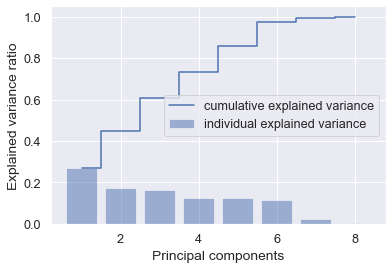

In [81]:
# Plotting The Explained Variance and Principal Components
plt.bar(range(1,9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

##### Observation
1. From above plot, it is clear that 6 dimensions are needed to explain 95% variance of data using PCA
2. Hence, First 6 principal components can be used to calculate the reduced dimensions using PCA

### 2.b. Deciding on complexity of the model - simple linear model or  quadratic or higher degree

In [82]:
# Fitting simple linear model
lr=LinearRegression()
lr.fit(X_train,y_train)
print('Score: ',lr.score(X_train,y_train))
y_pred_lrtr=lr.predict(X_train)
y_pred_lrte=lr.predict(X_test)
from sklearn.metrics import r2_score
print('Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_lrte))


Score:  0.7214971210103257
Train R2 score:  0.7214971210103257
Test R2 score:  0.6981381588376172


In [83]:
# Fitting polynomial models 
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.8620237272650242
Test R2 - degree 2 polynomial:  0.8372393147334634


In [84]:
pf = PolynomialFeatures(degree = 3)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 3 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 3 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 3 polynomial:  0.9419719814677285
Test R2 - degree 3 polynomial:  0.8756408680570978


In [85]:
pf = PolynomialFeatures(degree = 4)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 4 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 4 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 4 polynomial:  0.9836735288520724
Test R2 - degree 4 polynomial:  -7654.827863289242


In [86]:
pf = PolynomialFeatures(degree = 5)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 5 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 5 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 5 polynomial:  0.9904733281653806
Test R2 - degree 5 polynomial:  -5.6027689750947974e+17


#####  The model does not perform well for higher degree polynomial features ( degrees - 4, 5 , ...) . From this, it is clear that the model is non linear. Thus we proceed with other non-linear models

### 2.c. Exploring for Gaussians and Analysing Clusters of data in dataframe

From Pair Plot, we could see that :

- cement attribute has almost normal curve
- slag has two gausssians and rightly skewed
- ash has two gaussians and rightly skewed
- water has atleast three guassians and slighly left skewed
- superplastic has atleast two gaussians and rightly skewed
- coarseagg has three guassians and almost normal
- fineagg has almost two guassians and looks like normal
- age has multiple guassians and rightly skewed
- strength is almost a normal curve

Since data is mix of Gaussians, we are dividing dataframe in to clusters using K Means Clustering and exploring individual clusters to find out how the independent attributes are suitable to predict strength (target attribute)

In [128]:
# K Means Clustering
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.775014e+07
2,3,2.141025e+07
3,4,1.871289e+07
4,5,1.656518e+07
5,6,1.468766e+07
6,7,1.345202e+07
7,8,1.231798e+07
8,9,1.135431e+07
9,10,1.042354e+07


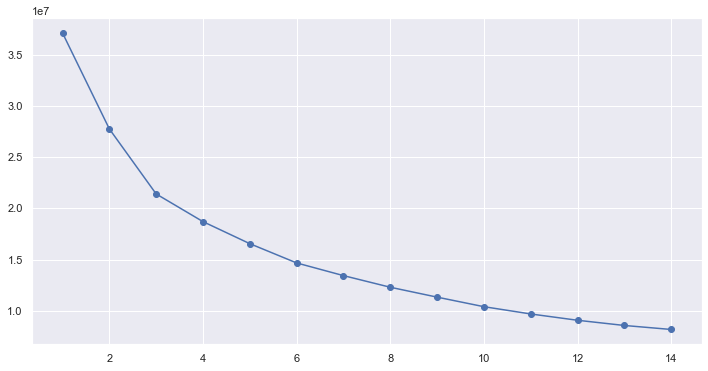

In [129]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [134]:
# From Elbow Plot, k=6
cluster = KMeans( n_clusters = 6, random_state = 1 )
cluster.fit(concrete_df_z)

KMeans(n_clusters=6, random_state=1)

In [135]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_df_z)
concrete_df_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
concrete_df_z_copy = concrete_df_z.copy(deep = True)

In [136]:
centroids = cluster.cluster_centers_
centroids

array([[-5.28470351e-01,  2.50470124e-01,  1.10117943e+00,
         4.70787095e-01,  5.10654428e-01, -1.14464266e+00,
        -3.42072986e-01, -2.24314804e-01, -2.78153391e-01,
         1.00000000e+00],
       [-8.49955763e-01,  1.42084044e+00, -8.47143932e-01,
         5.96975598e-01, -7.41075858e-01, -4.74644220e-02,
        -1.87490940e-01, -1.64869404e-01, -5.44128313e-01,
         2.00000000e+00],
       [-6.03963091e-01, -6.55884640e-01,  1.10862567e+00,
        -6.17413958e-01,  4.93982547e-01,  6.26867654e-01,
         4.32679650e-01,  2.78513387e-01, -1.33288470e-01,
         5.00000000e+00],
       [ 1.01509268e+00,  4.88115294e-01, -5.08388863e-01,
        -1.03076017e+00,  1.03518903e+00, -6.12919144e-01,
         1.81245550e-01,  8.21646294e-02,  1.20471909e+00,
         3.00000000e+00],
       [ 2.94371047e-01, -8.31365316e-01, -7.70799768e-01,
         4.35853672e-01, -9.87924559e-01,  5.08854798e-01,
         4.18311315e-01, -2.52959323e-01, -6.89220424e-01,
        -3.

In [140]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_df_z) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
0,-0.528470,0.250470,1.101179,0.470787,0.510654,-1.144643,-0.342073,-0.224315,-0.278153,1.000000e+00
1,-0.849956,1.420840,-0.847144,0.596976,-0.741076,-0.047464,-0.187491,-0.164869,-0.544128,2.000000e+00
2,-0.603963,-0.655885,1.108626,-0.617414,0.493983,0.626868,0.432680,0.278513,-0.133288,5.000000e+00
3,1.015093,0.488115,-0.508389,-1.030760,1.035189,-0.612919,0.181246,0.082165,1.204719,3.000000e+00
4,0.294371,-0.831365,-0.770800,0.435854,-0.987925,0.508855,0.418311,-0.252959,-0.689220,-3.108624e-15
5,1.429160,-0.440550,-0.699916,1.288683,-1.004450,0.182685,-1.629819,0.149343,0.676891,4.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A48BEB4BC8>,
      dtype=object)

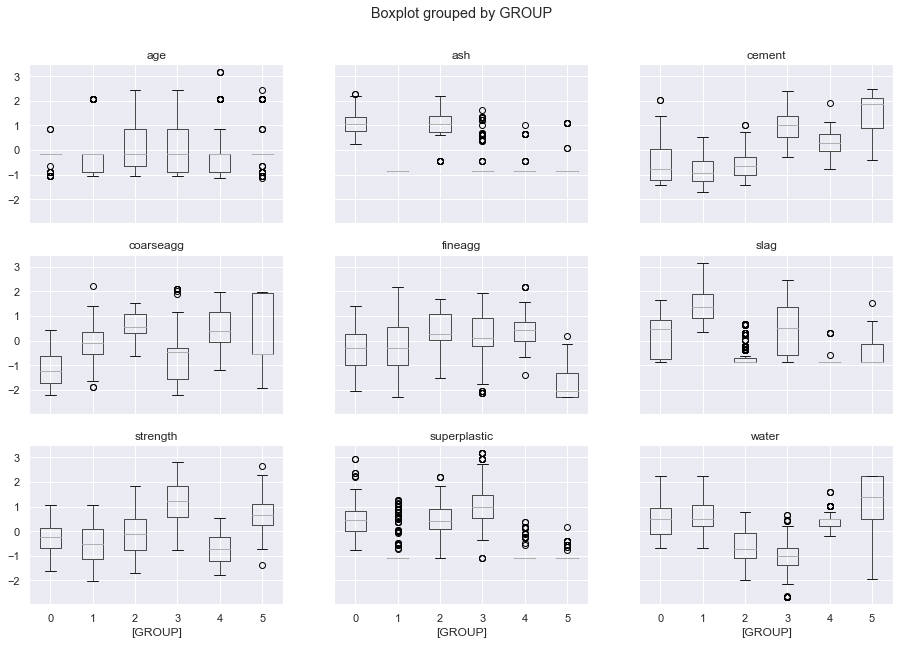

In [141]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
concrete_df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

##### Observations:

1. None of the dimensions are good predictor of target variable
2. For all the dimensions (variables) every cluster have a similar range of values except in one case.
3. We can see that the body of the cluster are overlapping.
4. So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them


## 3. Obtaining feature importance of individual features

In [88]:
# Using Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [89]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.356073
slag          0.096415
ash           0.011915
water         0.125792
superplastic  0.015247
coarseagg     0.036535
fineagg       0.029471
age           0.328552


1. cement, age and water are significant attributes
2. ash, coarseagg, fineagg, superplastic and slag are the less significant attributes. Target attribute (Strength) is impacted less by these 5 attributes. This has been noticed while analysing pairplot as well

In [90]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917907420889983
Performance on testing data using DT: 0.8436422429616641
Accuracy DT:  0.8436422429616641
MSE:  0.16321563818065118


##### Observation:
Decision Tree Model is performing well on training data & accuracy is getting dropped with testing data. Hence, DT model is overfit model

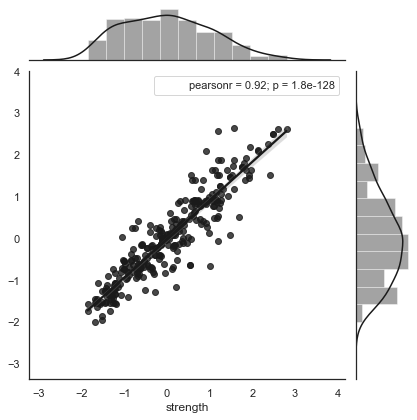

In [91]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [92]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642


In [93]:
# Using K fold Cross Validation
num_folds = 20
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.870738956894342
Standard Deviation:  0.04121928137273062


In [94]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739


In [95]:
# Iteration -2 is performed by dropping least significant attributes - ash, coarseagg and fineagg
concrete_df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   float64
 8   strength      1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [96]:
#Create a copy of the dataset
concrete_df2=concrete_df_z.copy()

In [97]:
# Creating X and y by dropping insignificant independent attributes
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [98]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [99]:
#printing the feature importance after dropping insignificant attributes
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.370948
slag          0.109385
water         0.158857
superplastic  0.031918
age           0.328893


##### Observations:
By using Decision Tree model, feature importance of individual features are analysed. Findings are:
1. cement, age and water are significant attributes
2. ash, coarseagg, fineagg, superplastic and slag are the less significant attributes. Among these 5 attributes, three attributes - ash, coarseagg and fineagg are least significant
3. Three Least significant attributes (ash, coarseagg and fineagg) are dropped from the dataset and feature importance is further analysed
4. During second iteration after dropping least significant attributes, only 2 attributes - cement and age - looks to be significant and water, slag and superplastic are less significant

## 4. Model Tuning

### 4.a. Finding suitable Algorithms and 4.b. Applying Model Tuning techniques

#### Measuring accuracy in the second iteration using Decision Tree

In [100]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.9910459656545207
Performance on testing data using DT: 0.8373098269067827
Accuracy DT:  0.8373098269067827


In [101]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310


##### Observation:
The fully grown tree is overfitting. This can be controlled by pruning the tree. Using grid search we find the optimum depth and the impurity criterion and other hyper parameters.

##### Pruning Decision Tree

In [102]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(3, 8),
             'criterion' : ['mse','mae'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

grid_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, scoring= 'r2')
grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=100, min_samples_split=5)
0.7558381330754882


In [103]:
dtpr=DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=100, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
dtpr.fit(X_train,y_train)
dtpr.score(X_train,y_train)
y_pred_dtprtr=dtpr.predict(X_train)
y_pred_dtprte=dtpr.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_dtprtr))
print('Test R2 score: ',r2_score(y_test,y_pred_dtprte))

Train R2 score:  0.8938132426977499
Test R2 score:  0.8010287948570307


##### It's severely overfit even now. We still have to tune it

In [104]:
param_grid = {'max_depth': np.arange(3, 6),
             'criterion' : ['mse','mae'],
             'max_leaf_nodes': [100,105, 90,95],
             'min_samples_split': [6,7,8,9,10],
             'max_features':[2,3,4,5,6]}

grid_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, scoring= 'r2')
grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

DecisionTreeRegressor(max_depth=5, max_features=3, max_leaf_nodes=95,
                      min_samples_split=8)
0.7297745308015888


In [112]:
# Tuning the model by setting max_depth = 4 and min_samples_leaf=5

X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [118]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


In [119]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7255811799299219
Performance on testing data using DT: 0.6548277186105129
Accuracy DT:  0.6548277186105129
MSE:  0.36031160369896825


In [120]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828


In [121]:
# K fold cross validation after pruning

num_folds = 20
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6785562583989007
Standard Deviation:  0.085398758170893


In [122]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556


In [123]:
#Create a copy of the dataset
concrete_df3=concrete_df_z.copy()

In [124]:
X = concrete_df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [125]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [126]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7249584363084667
Performance on testing data using DT: 0.6634677033758938
Accuracy DT:  0.6634677033758938
MSE:  0.35129266754854116


In [127]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468


The overfit has reduced but the model performance has nt imporoved on the test data. So we now move onto other models.

##### Applying Random Forest

In [142]:
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [144]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [145]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9796466300024916
Performance on testing data using RFR: 0.9019596378681226
Accuracy DT:  0.9019596378681226
MSE:  0.10234043117472709


This model is also overfit

In [146]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960


##### Applying K Fold Cross Validation for Random Forest Regressor

In [147]:
num_folds = 20
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9116959327903625
Standard Deviation:  0.030123769031816797


In [148]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960
8,Random Forest Regressor k fold,0.911696


##### Applying Gradient Boosting Regressor

In [149]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [150]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9430469892492805
Performance on testing data using GBR: 0.8916263106796429
Accuracy DT:  0.8916263106796429
MSE:  0.11312698007094633


In [151]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960
8,Random Forest Regressor k fold,0.911696
9,Gradient Boost Regressor,0.891626


##### Applying K Fold Cross Validation for Gradient Boost Regressor

In [153]:
num_folds = 20
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8994406164141913
Standard Deviation:  0.026613839674319704


In [154]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960
8,Random Forest Regressor k fold,0.911696
9,Gradient Boost Regressor,0.891626
10,Gradient Boost Regressor k fold,0.899441


##### Applying Ada Boosting Regressor

In [156]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [157]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using ABR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ABR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.8123108680332485
Performance on testing data using GBR: 0.7462837311428998
Accuracy DT:  0.7462837311428998
MSE:  0.264844312957062


In [158]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960
8,Random Forest Regressor k fold,0.911696
9,Gradient Boost Regressor,0.891626
10,Gradient Boost Regressor k fold,0.899441


##### Applying K Fold Cross Validation for Ada Boosting Regressor

In [159]:
num_folds = 20
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7762135999141409
Standard Deviation:  0.04327261075305502


In [160]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960
8,Random Forest Regressor k fold,0.911696
9,Gradient Boost Regressor,0.891626
10,Gradient Boost Regressor k fold,0.899441


##### Applying Bagging Regressor

In [162]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor()

In [164]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using BR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using BR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using BR: 0.9746187132469172
Performance on testing data using BR: 0.8949796909880475
Accuracy DT:  0.8949796909880475
MSE:  0.1096265198605553


In [165]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960
8,Random Forest Regressor k fold,0.911696
9,Gradient Boost Regressor,0.891626
10,Gradient Boost Regressor k fold,0.899441


##### Applying K Fold Cross validation for Bagging Regressor

In [166]:
num_folds = 20
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8969176677560238
Standard Deviation:  0.03426800801133285


In [167]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960
8,Random Forest Regressor k fold,0.911696
9,Gradient Boost Regressor,0.891626
10,Gradient Boost Regressor k fold,0.899441


##### Applying KNN Regressor

In [168]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

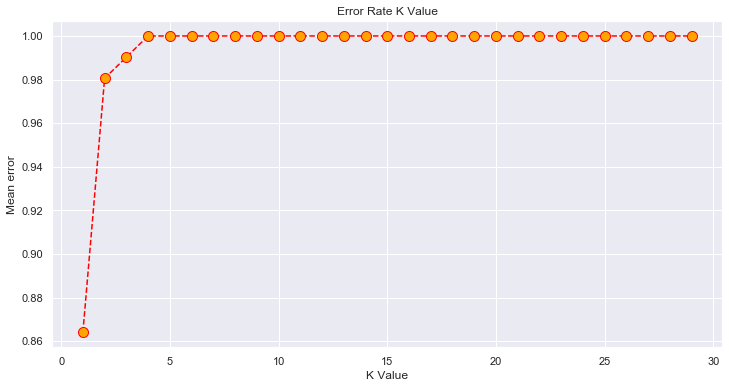

In [171]:
# Plotting to find right K value
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='orange',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [172]:
#From the graph, we could find that k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [173]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8902196318573777
Performance on testing data using KNNR: 0.8078817663272165
Accuracy KNNR:  0.8078817663272165
MSE:  0.20054457616295157


In [174]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960
8,Random Forest Regressor k fold,0.911696
9,Gradient Boost Regressor,0.891626
10,Gradient Boost Regressor k fold,0.899441


##### Applying K Fold Cross validation for KNN Regressor

In [175]:
num_folds = 20
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8003178956679271
Standard Deviation:  0.04956618739184994


In [176]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960
8,Random Forest Regressor k fold,0.911696
9,Gradient Boost Regressor,0.891626
10,Gradient Boost Regressor k fold,0.899441


##### Applying Support Vector Regressor

In [180]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [181]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.907587155426287
Performance on testing data using SVR: 0.8661116249489591
Accuracy SVR:  0.8661116249489591
MSE:  0.1397607447999408


In [182]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960
8,Random Forest Regressor k fold,0.911696
9,Gradient Boost Regressor,0.891626
10,Gradient Boost Regressor k fold,0.899441


##### Applying K Fold Cross validation for SVR

In [184]:
num_folds = 20
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8694485293702338
Standard Deviation:  0.03857288020959395


In [185]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960
8,Random Forest Regressor k fold,0.911696
9,Gradient Boost Regressor,0.891626
10,Gradient Boost Regressor k fold,0.899441


##### Applying multiple model ensemble of KNN Regressor, SVR and LR

In [187]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='rbf')
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KN', KNeighborsRegressor(n_neighbors=3)),
                            ('SVM', SVR())])

In [188]:
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8853174094316484
Performance on testing data using ensemble: 0.8456288613270715
Accuracy ensemble:  0.8456288613270715
MSE:  0.16114188635360327


In [189]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960
8,Random Forest Regressor k fold,0.911696
9,Gradient Boost Regressor,0.891626
10,Gradient Boost Regressor k fold,0.899441


##### Applying K fold cross validation for Ensemble of LR,SVR and KNN Regressor

In [190]:
num_folds = 20
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8437155394080866
Standard Deviation:  0.04043617493996482


In [191]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843642
2,Decision Tree k fold,0.870739
3,Decision Tree2,0.837310
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.678556
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.901960
8,Random Forest Regressor k fold,0.911696
9,Gradient Boost Regressor,0.891626
10,Gradient Boost Regressor k fold,0.899441


##### Observations:
1. After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor are giving better results as compared to other models
2. Now as the dataset have different gaussians, we can apply k means clustering and then we can apply the models and compare the accuracy

### 4.c. Model performance range at 95% confidence level

##### Bootstrap Sampling using Gradient Boosting Regressor

In [192]:
concrete_XY = X.join(y)

In [198]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 100        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

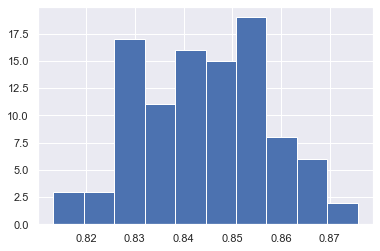

95.0 confidence interval 81.8% and 86.8%


In [199]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

##### Bootstrap sampling using Random Forest Regressor

In [197]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 100        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

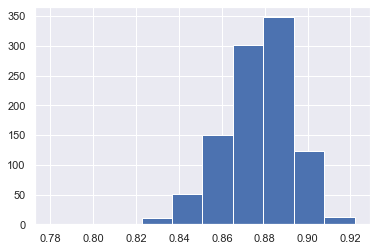

95.0 confidence interval 84.3% and 90.5%


In [196]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### Conclusion:

The bootstrap random forest classification model performance is between 84.3%-90.5% which is better than other classification algorithms at 95% confidence interval